<a href="https://colab.research.google.com/github/Shreya030797/ML-Projects/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PIMA India Diabetes Dataset

The dataset referred to as the Pima Indian Diabetes Dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. It encompasses data related to 768 women hailing from a population in close proximity to Phoenix, Arizona, United States. The focal point of investigation was the presence of Diabetes, with 258 individuals testing positive and 500 individuals testing negative.


*   Number of Pregnancies ( count of instances of pregnancy)
*   Oral Glucose Tolerance Test - OGTT (representing the concentration of plasma glucose after a two-hour interval following the consumption of 75g of anhydrous glucose, measured in mg/dl)
*   Blood Pressure (pertaining to Diastolic Blood Pressure measured in mmHg)
*   Skin Thickness (indicating Triceps skin fold thickness measured in mm)
*   Insulin (depicting 2-hour serum insulin levels measured in mu U/ml)
*   BMI (Body Mass Index, kg/m2)
*   Age (years)
*   Pedigree Diabetes Function (defined as a 'function that assesses the likelihood of disease susceptibility based on a projection from the medical history of their ancestors')
*   Outcome (1 as True, 0 as False)





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

In [ ]:
data = pd.read_csv(df)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
#To check the nulls within the dataset
data.isnull().values.any()

False

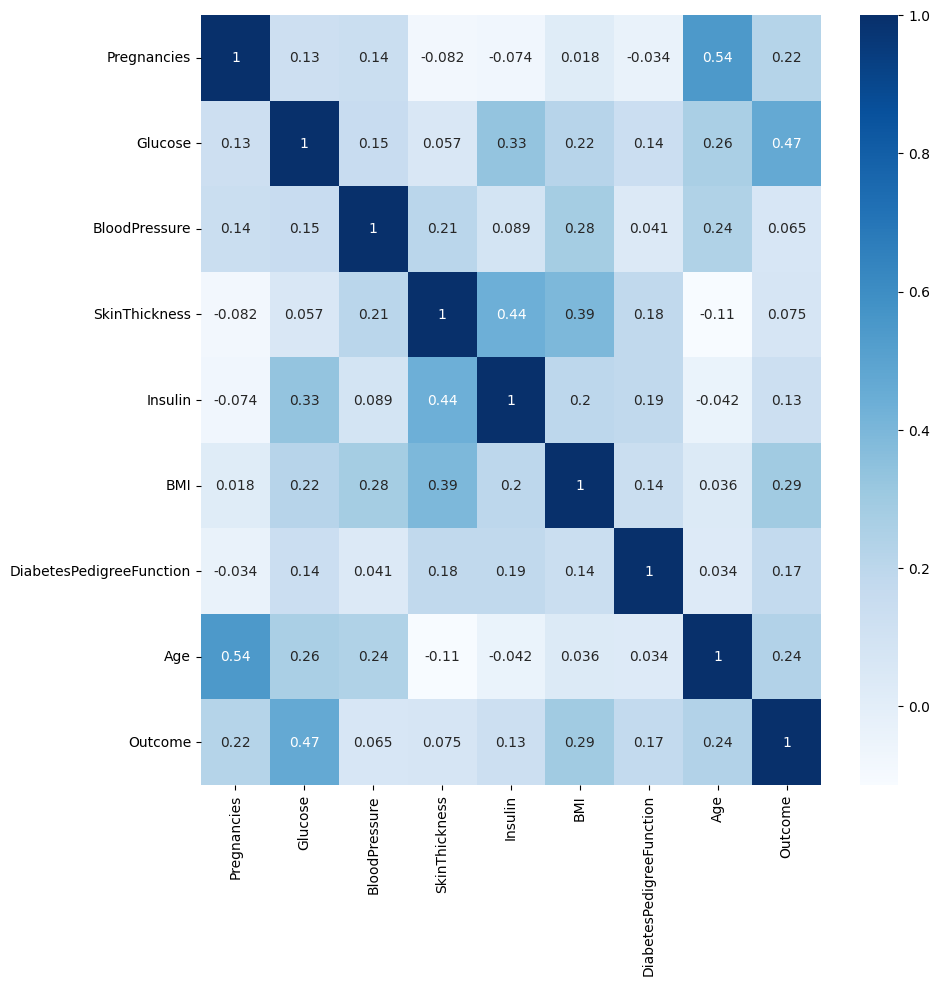

In [ ]:
#to find the correlation

import seaborn as sns

crr = data.corr()
crr_features = crr.index
plt.figure(figsize = (10,10))

#plotting a heat map

CorrMap = sns.heatmap(data[crr_features].corr(), annot = True, cmap = "Blues")

Age x pregnancies (0.54) - Old women with high no. of pregnancies,
Glucose x insulin (0.33) - Higher Glocose, Higher insulin ,
Glucose x outcome (0.47) - Pregnant women generally have higher risk of Diabetes,
Skin fold thickness x Insulin (0.44) -  at higher risk of Diabetes,
Skin fold thickness x BMI (0.39) - probably are overweight/obese

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
#To balance the dataset
diabetes_true_count = len(data.loc[data['Outcome'] == 1])
diabetes_false_count = len(data.loc[data['Outcome'] == 0])

(diabetes_true_count, diabetes_false_count)

(268, 500)

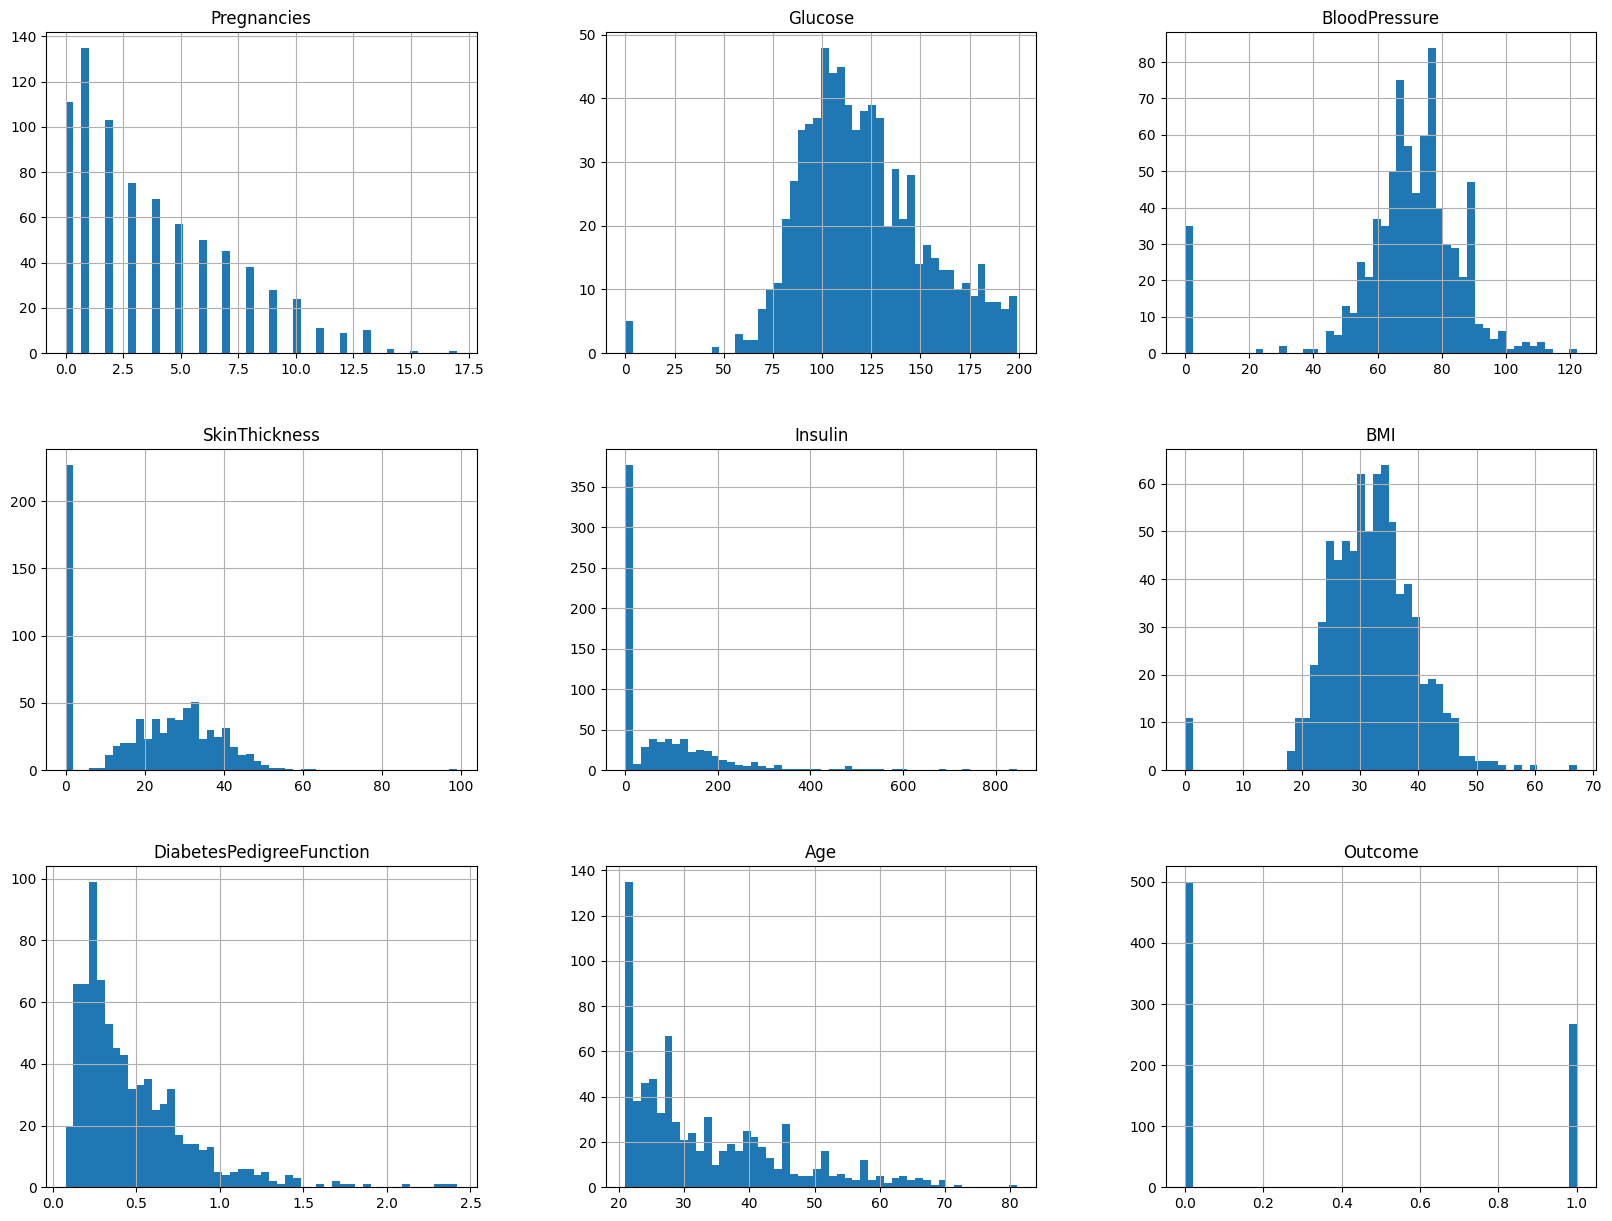

In [ ]:
#Attribute Distrubution

data.hist(bins=50, figsize=(20, 15))
plt.show()

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

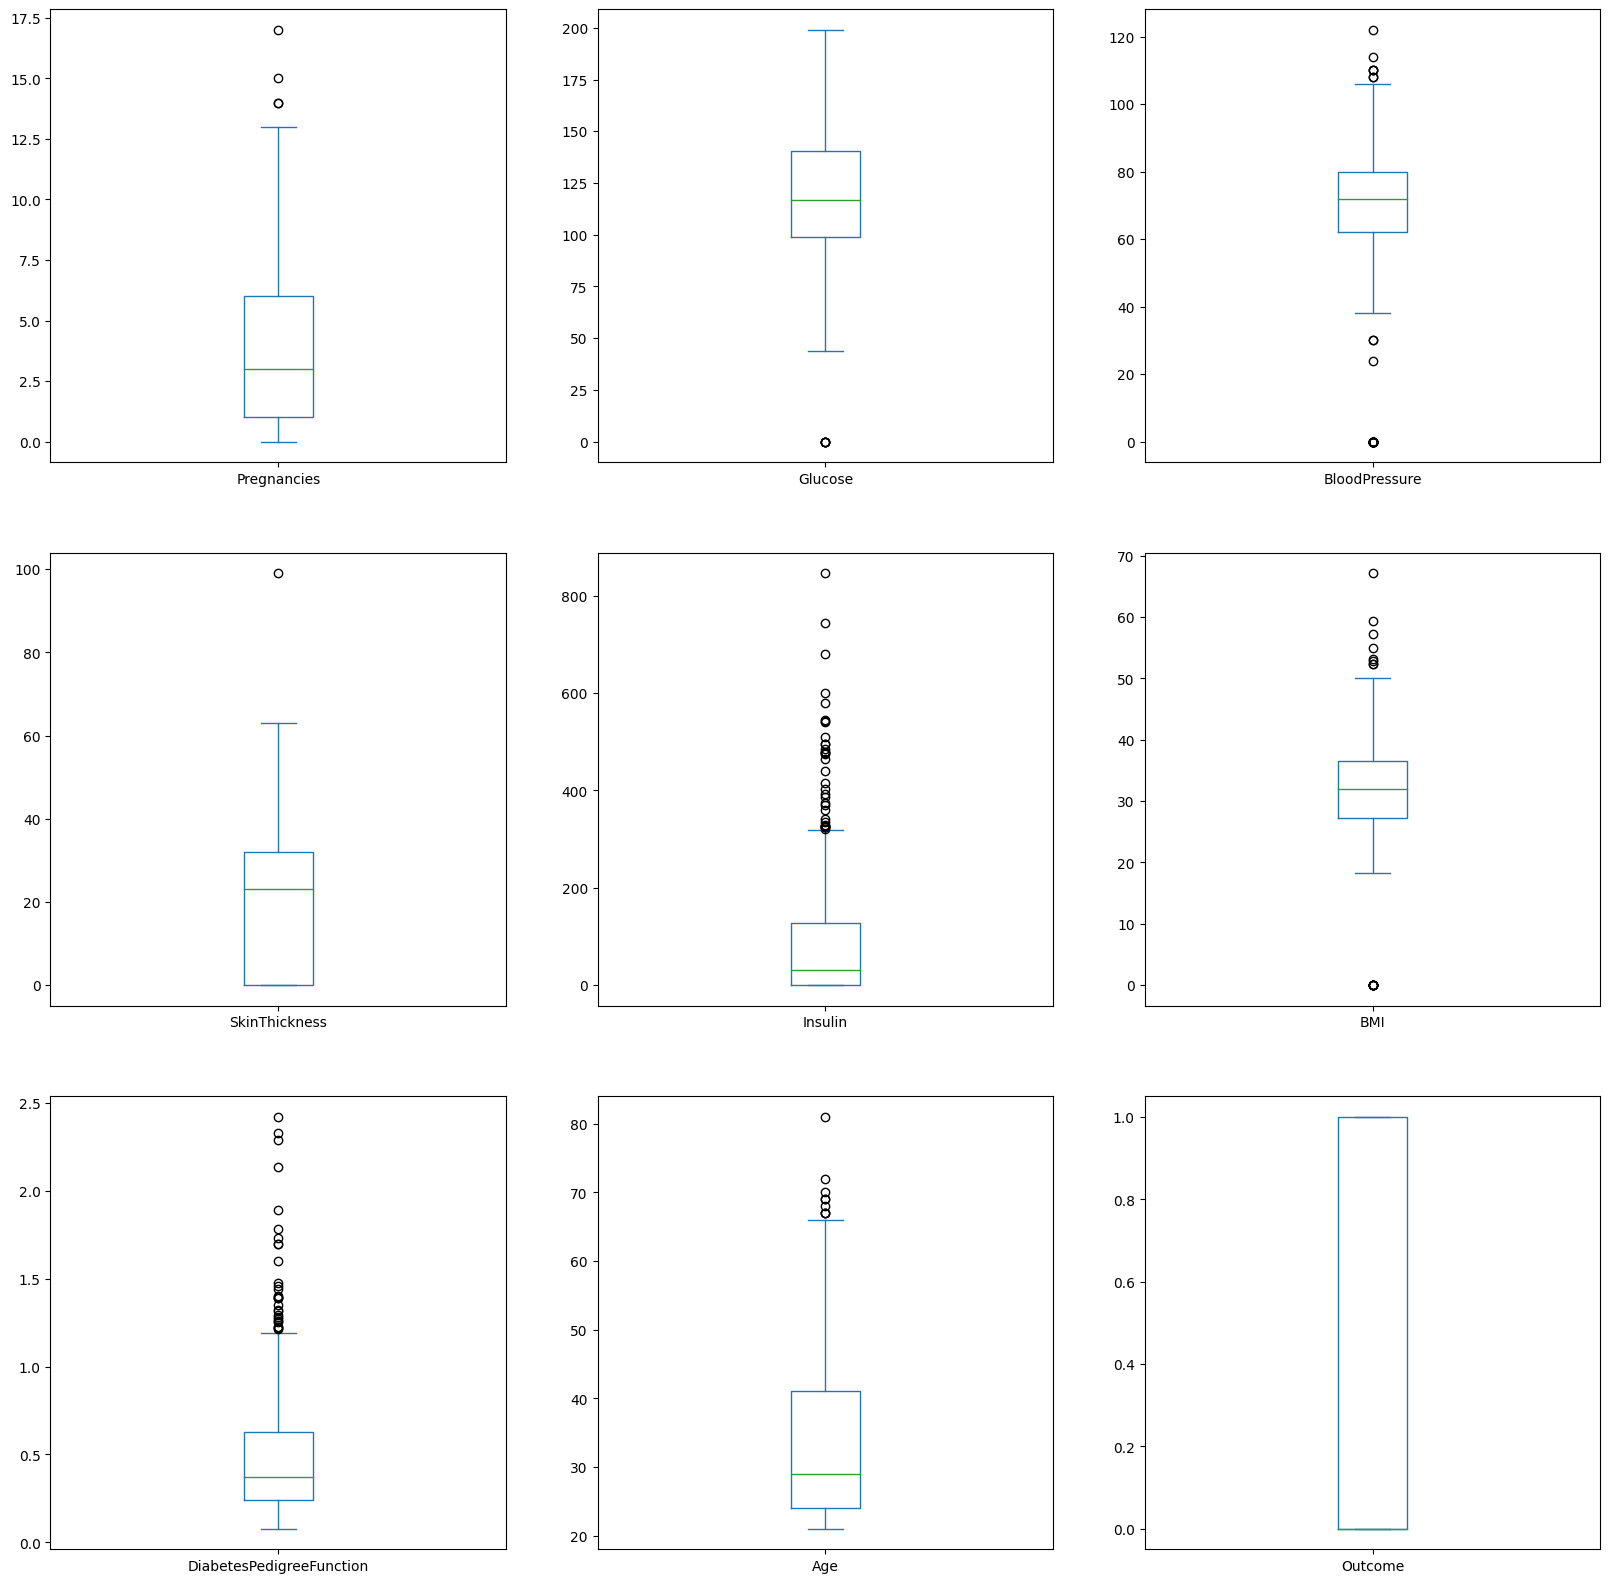

In [ ]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))

It can be observed that large no. of women:

1. have 1 or more Pregnancies
2. have Glucose level of more than 100 mg/dL            
3. have Blood Pressure level more than 65 mmHg
4. have Insulin level more than 50
5. have BMI more than 30 kg/m^2              
6. are 25 years or old

In [ ]:
#Train Test Split to apply ML algorithm

from sklearn.model_selection import train_test_split
X = data.iloc[:, 0:7].values
Y = data.iloc[:, [8]].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)

In [ ]:
#To check missing or values in the X features

print("total number of rows : {0}", format(len(data)))
print("Missing rows in Pregnancies : {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("Missing rows in Glucose : {0}".format(len(data.loc[data['Glucose'] == 0])))
print("Missing rows in SkinThickness : {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("Missing rows in Insulin : {0}".format(len(data.loc[data['Insulin'] == 0])))
print("Missing rows in BMI : {0}".format(len(data.loc[data['BMI'] == 0])))
print("Missing rows in DiabetesPedigreeFunction : {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Missing rows in Age : {0}".format(len(data.loc[data['Age'] == 0])))


total number of rows : {0} 768
Missing rows in Pregnancies : 111
Missing rows in Glucose : 5
Missing rows in SkinThickness : 227
Missing rows in Insulin : 374
Missing rows in BMI : 11
Missing rows in DiabetesPedigreeFunction : 0
Missing rows in Age : 0


In [ ]:
#To replace these nulls, using Mean Imputation function

from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values = 0, strategy = "mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [ ]:
X_train

array([[2.00000000e+00, 8.90000000e+01, 9.00000000e+01, ...,
        1.59968641e+02, 3.35000000e+01, 2.92000000e-01],
       [4.00000000e+00, 1.46000000e+02, 8.50000000e+01, ...,
        1.00000000e+02, 2.89000000e+01, 1.89000000e-01],
       [1.00000000e+01, 1.11000000e+02, 7.00000000e+01, ...,
        1.59968641e+02, 2.75000000e+01, 1.41000000e-01],
       ...,
       [3.00000000e+00, 1.16000000e+02, 7.40000000e+01, ...,
        1.05000000e+02, 2.63000000e+01, 1.07000000e-01],
       [1.00000000e+00, 8.80000000e+01, 3.00000000e+01, ...,
        9.90000000e+01, 5.50000000e+01, 4.96000000e-01],
       [5.00000000e+00, 9.60000000e+01, 7.40000000e+01, ...,
        6.70000000e+01, 3.36000000e+01, 9.97000000e-01]])

In [ ]:
#Apply First Algorithm


from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state= 10)

random_forest_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(random_state=10)

In [ ]:
#Prediction on the X_test data

predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

Accuracy = metrics.accuracy_score(Y_test, predict_train_data)
print("Accuracy : ", Accuracy)

Accuracy :  0.7489177489177489


With Random Forest Classifier, the Accuracy is around 74%. Let's check if we can find more accurate model with other algorithms.

In [ ]:
#Hyperparameter Test

params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma": [0.0, 0.1, 0.2, 0.3,0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]

}

In [ ]:
#Hyperparameter using RandomizedSeachCV

from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(classifier, param_distributions= params, n_iter = 5, scoring = 'roc_auc', n_jobs =-1, cv = 5, verbose =3)

In [ ]:
random_search.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
classifier = xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=0, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)

In [ ]:
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X_train, Y_train.ravel(), cv = 10)
score

array([0.74074074, 0.77777778, 0.75925926, 0.77777778, 0.74074074,
       0.74074074, 0.85185185, 0.64150943, 0.81132075, 0.79245283])

In [ ]:
score.mean()

0.7634171907756814

The accuracy seems to have improved using XGboost

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_test, Y_pred)
score = accuracy_score(Y_test, Y_pred)

print(cm)

[[123  21]
 [ 38  49]]


123 + 21 positives and 38 + 49 negatives

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [ ]:
Y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[132  12]
 [ 48  39]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       144
           1       0.76      0.45      0.57        87

    accuracy                           0.74       231
   macro avg       0.75      0.68      0.69       231
weighted avg       0.75      0.74      0.72       231



KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier (you can adjust the number of neighbors 'n_neighbors')
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn_model.fit(X_train, Y_train.ravel())

# Make predictions on the training data
y_pred = knn_model.predict(X_test)


In [ ]:

print('Accuracy of KNN on test set: {:.2f}'.format(knn_model.score(X_test, Y_test)))


Accuracy of KNN on test set: 0.68
